This is a brief data cleaning project using data form FiveThirtyEight based on [Marvel Wikia(https://marvel.fandom.com/it/wiki/Pagina_principale) about the Avengers, a group of super heroes introduced by Marvel Comics around 1960.<br>
The original data can be found in this [github repo](https://github.com/fivethirtyeight/data/tree/master/avengers)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
avengers = pd.read_csv("avengers.csv", encoding='latin-1')
avengers.head(5)

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


In [3]:
avengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
URL                            173 non-null object
Name/Alias                     163 non-null object
Appearances                    173 non-null int64
Current?                       173 non-null object
Gender                         173 non-null object
Probationary Introl            15 non-null object
Full/Reserve Avengers Intro    159 non-null object
Year                           173 non-null int64
Years since joining            173 non-null int64
Honorary                       173 non-null object
Death1                         173 non-null object
Return1                        69 non-null object
Death2                         17 non-null object
Return2                        16 non-null object
Death3                         2 non-null object
Return3                        2 non-null object
Death4                         1 non-null object
Return4                        1 non-null

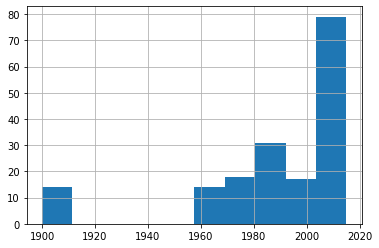

In [4]:
avengers['Year'].hist();

Plotting the years in which Avengers were introduced, many seem to be creted in 1900, but despite the fact that some Avengers can travel in time, we know that in this universe Marvel Comics has been founded in 1939 ([see this wikipedia page](https://en.wikipedia.org/wiki/Marvel_Comics)). <br>
Please note, I cannot garantee this holds for all the multiverse. <br>

I'm going to remove Avenger created before 1960.

In [5]:
true_avengers = avengers[avengers['Year'] >= 1960]

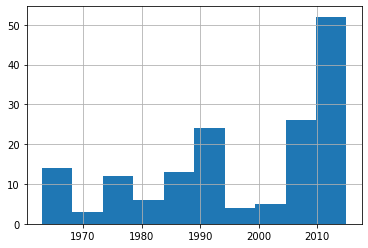

In [6]:
true_avengers.Year.hist();

Many Avengers die and then are brought to life back again by comic authors (this is a very common pattern for Marvel), so an Avenger can experience death more than one time. <br>
There are five columns for death, named from Death1 to Death5. I'll create a column called Deaths summing all the times an Avenger has died.

In [7]:
death_columns = ['Death1', 'Death2', 'Death3', 'Death4', 'Death5']
deaths = true_avengers[death_columns].copy()

In [8]:
deaths['Death1'].value_counts(dropna=False)

NO     91
YES    68
Name: Death1, dtype: int64

In [9]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 0 to 172
Data columns (total 5 columns):
Death1    159 non-null object
Death2    16 non-null object
Death3    2 non-null object
Death4    1 non-null object
Death5    1 non-null object
dtypes: object(5)
memory usage: 7.5+ KB


In [10]:
boolean_deaths = deaths.apply(lambda x: x == 'YES')

In [11]:
boolean_deaths.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 0 to 172
Data columns (total 5 columns):
Death1    159 non-null bool
Death2    159 non-null bool
Death3    159 non-null bool
Death4    159 non-null bool
Death5    159 non-null bool
dtypes: bool(5)
memory usage: 2.0 KB


In [12]:
boolean_deaths['Death1'].value_counts(dropna=False)

False    91
True     68
Name: Death1, dtype: int64

In [13]:
total_deaths = boolean_deaths.sum(axis=1)

In [14]:
total_deaths.value_counts(dropna=False)

0    91
1    52
2    14
5     1
3     1
dtype: int64

In [15]:
true_avengers['Deaths'] = total_deaths

C:\Users\Tundra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
true_avengers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 0 to 172
Data columns (total 22 columns):
URL                            159 non-null object
Name/Alias                     149 non-null object
Appearances                    159 non-null int64
Current?                       159 non-null object
Gender                         159 non-null object
Probationary Introl            13 non-null object
Full/Reserve Avengers Intro    159 non-null object
Year                           159 non-null int64
Years since joining            159 non-null int64
Honorary                       159 non-null object
Death1                         159 non-null object
Return1                        68 non-null object
Death2                         16 non-null object
Return2                        16 non-null object
Death3                         2 non-null object
Return3                        2 non-null object
Death4                         1 non-null object
Return4                        1 non-null

In [17]:
death_columns = ['Death1', 'Death2', 'Death3', 'Death4', 'Death5']
deaths = true_avengers[death_columns].copy()
total_deaths = deaths.apply(lambda x: x == 'YES').sum(axis=1)
true_avengers['Deaths'] = total_deaths

C:\Users\Tundra\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [18]:
true_avengers['Deaths'].value_counts()

0    91
1    52
2    14
5     1
3     1
Name: Deaths, dtype: int64

Most Avengers didn't die or died just one time, but there is one Avenger that died five times.

Let's now calculate if the column "Years since joining" is accurate and how many columns have a correct value. <br>
The data was collected in 2015, so I'll use this year for calculations.

In [19]:
years_of_service = 2015 - true_avengers['Year']

In [20]:
accuracy = true_avengers['Years since joining'] == years_of_service

In [21]:
joined_accuracy_count = accuracy.sum()

It seems data in joined_accuracy is correct for our cleaned dataset.